In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
dataset1 = pd.read_csv('AdvWorksCusts.csv')

In [4]:
print(dataset1.shape)
dataset1.head()

(16519, 23)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [5]:
dataset2 = pd.read_csv('AW_AveMonthSpend.csv')

In [6]:
print(dataset2.shape)
dataset2.head()

(16519, 2)


,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [7]:
dataset1.drop_duplicates(subset = 'CustomerID' , keep = 'first' , inplace = True)
print(dataset1.shape)
print(dataset1.CustomerID.unique().shape)

(16404, 23)
(16404,)


In [8]:
dataset2.drop_duplicates(subset = 'CustomerID' , keep = 'first' , inplace = True)
print(dataset2.shape)
print(dataset2.CustomerID.unique().shape)

(16404, 2)
(16404,)


In [9]:
dataset3 = pd.merge(dataset1,dataset2)
print(dataset3.shape)
dataset3.head()

(16404, 24)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [10]:
dataset3['BirthDate'].head(10)

0    1966-04-08
1    1965-05-14
2    1965-08-12
3    1968-02-15
4    1968-08-08
5    1965-08-05
6    1965-12-06
7    1964-05-09
8    1964-07-07
9    1964-04-01
Name: BirthDate, dtype: object

In [11]:
from datetime import date

def calc_age(bornyear,bornmonth,bornday):
    today =date.today()
    res = (today.year - bornyear) - ((today.month,today.day)<(bornmonth , bornday))
    return res

In [12]:
ages = []

for i in dataset3['BirthDate']:
    birthday = str(i)
    birthday =birthday.split('-')
    a = calc_age(int(birthday[0]),int(birthday[1]),int(birthday[2]))
    ages.append(a)
    
dataset3['Age'] = ages
    

In [13]:
dataset3.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,53
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,54
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,54
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,52
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,51


In [14]:
Feature_names = ['HomeOwnerFlag', 'Age', 'NumberChildrenAtHome', 'TotalChildren', 'NumberCarsOwned','YearlyIncome']

Features = np.array(dataset3[Feature_names])
Labels = np.array(dataset3['AveMonthSpend'])
print(len(Features),len(Labels), Features.shape)

16404 16404 (16404, 6)


In [15]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc_cat_features = enc.fit_transform(cat_features)
    
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit_transform(enc_cat_features.reshape(-1,1))
    return enc_cat_features.reshape(-1,1)

In [16]:
temp1 = encode_string(dataset1['Gender'])

temp2 = encode_string(dataset1['MaritalStatus'])

Features = np.concatenate([Features,temp1,temp2],axis=1)
print(temp1)
print("-------------")
print(temp2)

[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]
-------------
[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [0]]


In [17]:
print(Features.shape)   

(16404, 8)


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Features, Labels,test_size=0.3)

In [19]:
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

11482 4922 11482 4922


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Build Model Without Library

In [21]:
X0 = np.ones([X_train.shape[0],1])
X = np.concatenate((X0,X_train), axis = 1)
Y = Y_train
theta = np.zeros(X.shape[1]).T
alpha = 0.0001

In [22]:
print(X.shape, Y.shape, theta.shape)

(11482, 9) (11482,) (9,)


In [23]:
def cost_function(X,Y,theta):
    m =len(X)
    J= np.sum((X.dot(theta) - Y)**2)/(2*m)
    return J

In [24]:
print(cost_function(X,Y,theta))

2993.855033966208


In [25]:
def gradient_descent(X,Y,theta,alpha,iterations):
    cost_histroy = np.zeros(iterations)
    m = len(X)
    
    for i in range(iterations):
        h = X.dot(theta)
        loss = h -Y
        gradient = X.T.dot(loss)
        theta = theta - alpha / m * gradient
        cost = cost_function(X,Y,theta)
        cost_histroy[i] = cost
        
    return theta , cost_histroy        

In [26]:
gradient_descent(X,Y,theta,alpha,100000)

(array([ 7.24406249e+01, -6.18234636e-02, -2.13919704e+00,  1.57667287e+01,
         1.34131497e+00, -2.25645926e-01,  7.91695341e+00,  1.41095751e+01,
        -3.17757142e+00]),
 array([2993.20749116, 2992.56010481, 2991.91287488, ...,   20.48282914,
          20.48282282,   20.4828165 ]))

In [27]:
theta, cost_history = gradient_descent(X, Y, theta, alpha, 100000)

In [28]:
def rmse(Y,Y_predict):
    rmse = np.sqrt(sum((Y - Y_predict)**2) / len(Y))
    return rmse
def r2score(Y,Y_predict):
    mean_y = np.mean(Y)
    ss_total = sum((Y - mean_y) ** 2)
    ss_result = sum((Y - Y_predict)**2)
    r2 = 1 - (ss_result / ss_total)
    return r2

In [29]:
theta0 = theta[0]
thetas = theta[1:X_test.shape[1]+1]
Y_predict = X_test.dot(thetas) + theta0

rmse = rmse(Y_test, Y_predict)
r2 = r2score(Y_test, Y_predict)
print('RMSE                    = ' + str(rmse))
print('R^2                    = ' + str(r2))

RMSE                    = 6.47087111829126
R^2                    = 0.9443839535438336


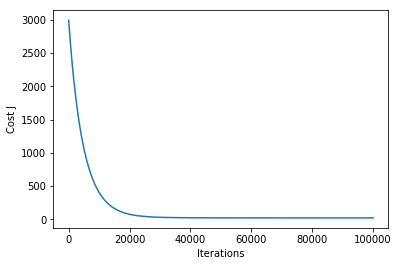

In [30]:
plt.plot(cost_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

# Build Model Using Library

In [34]:
from sklearn.linear_model import LinearRegression 
LR = LinearRegression() 
LR.fit(X_train, Y_train) 
pred = LR.predict(X_test)
pred


array([ 37.48087469,  67.23465498,  43.0452203 , ...,  93.92584864,
        82.68567698, 139.28457857])

In [35]:
Y_test

array([ 44,  68,  48, ...,  88,  86, 159], dtype=int64)

In [36]:
import sklearn.metrics as mt
from math import sqrt
print("Acc:",mt.r2_score(pred,Y_test))
print("RSME",sqrt(mt.mean_squared_error(pred,Y_test)))

Acc: 0.941327859551109
RSME 6.462210132993372


In [37]:
Features[0]

array([     1,     53,      0,      2,      0, 137947,      1,      0],
      dtype=int64)

In [48]:
new_predict =np.array([     1,     53,      0,      2,      0, 137947,      1,      0]).reshape(1,-1)
new_predict = scaler.transform(new_predict)
pred = LR.predict(new_predict)
pred

array([91.33018884])